In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Step 2: Load the dataset (Upload your dataset to Google Colab first)
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('wine.csv')  # Adjust the filename as necessary
print("Data Loaded:")
print(df.head())  # Print the first few rows to ensure the data is loaded

Saving wine.csv to wine (1).csv
Data Loaded:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


Data Types:
Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object
Checking for missing values...
Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


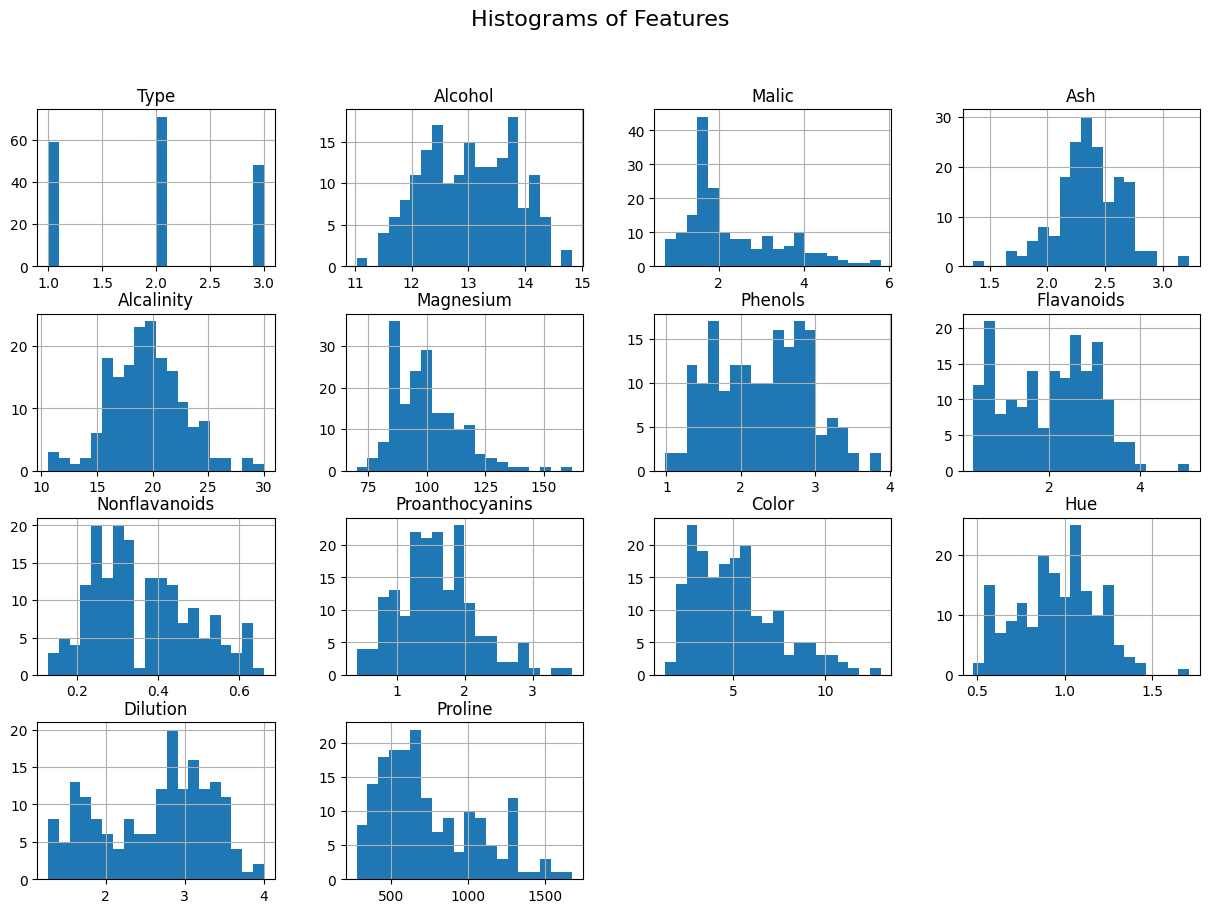

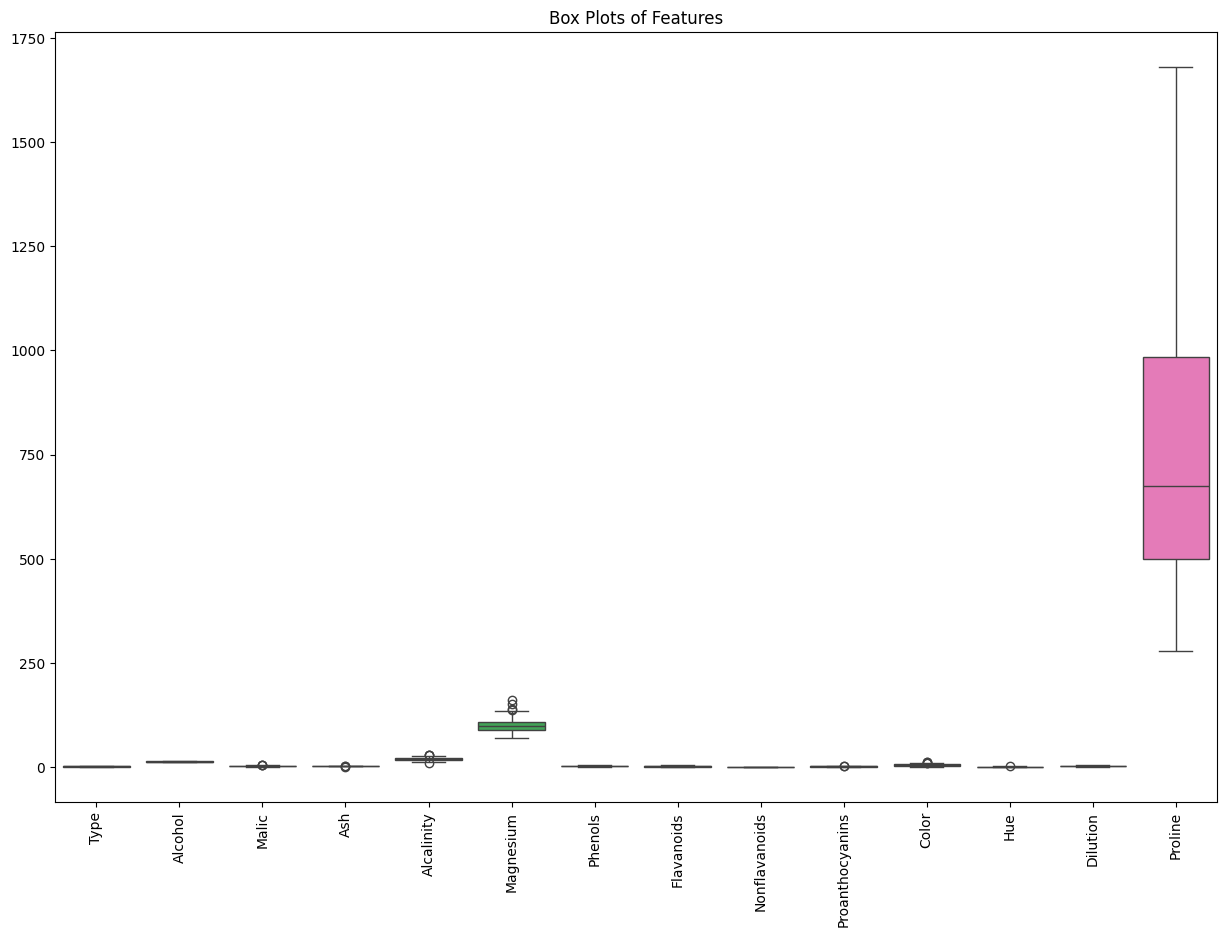

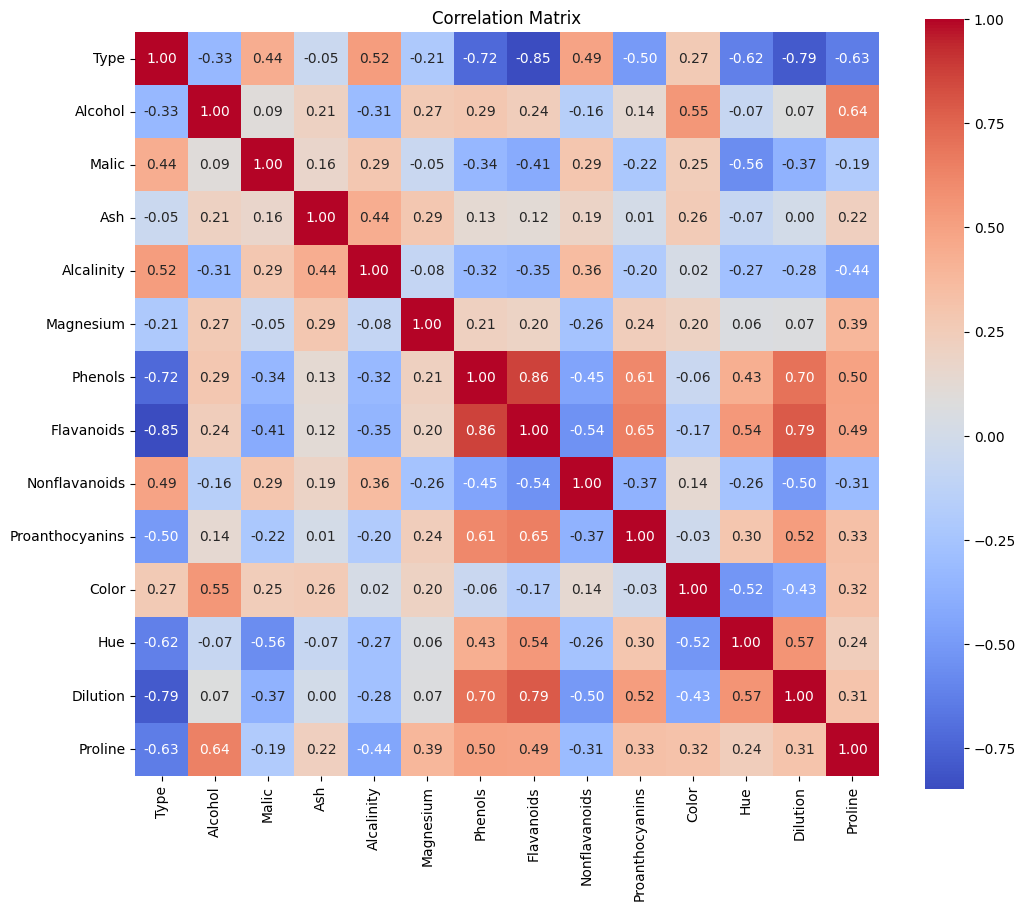

In [3]:
# Task 1: Exploratory Data Analysis (EDA)
# 1. Basic data exploration
print("Data Types:")
print(df.dtypes)

print("Checking for missing values...")
print(df.isnull().sum())  # Show missing values count

# 2. Examine the distribution of features
# Histograms
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Box Plots of Features')
plt.xticks(rotation=90)
plt.show()

# 3. Investigate correlations between features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Scaled Data Shape: (178, 14)


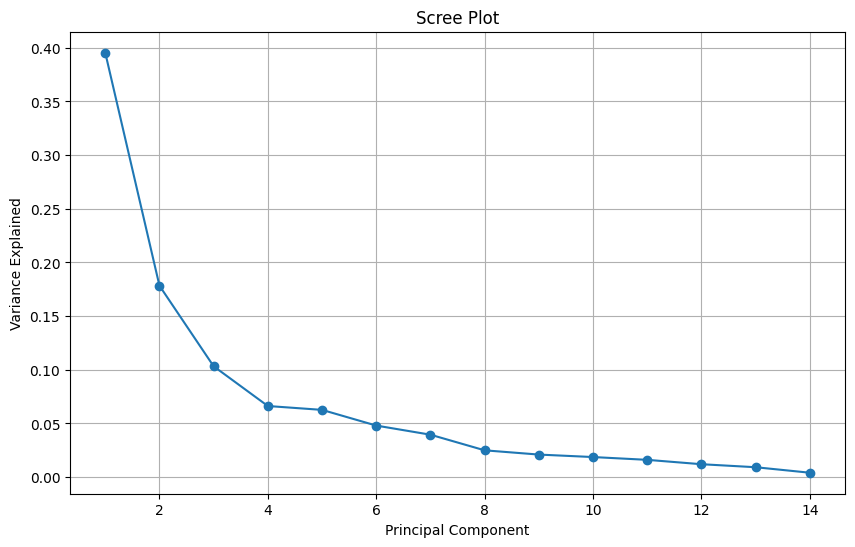

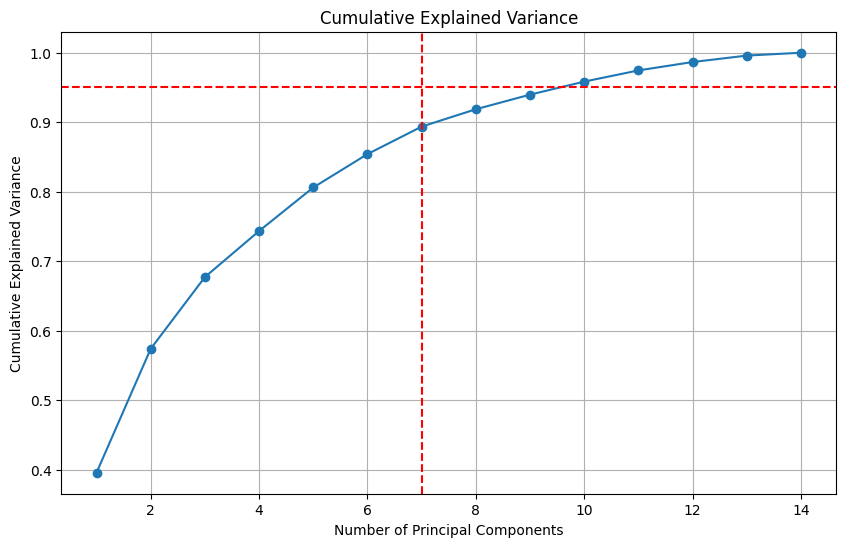

Transformed data shape: (178, 7)


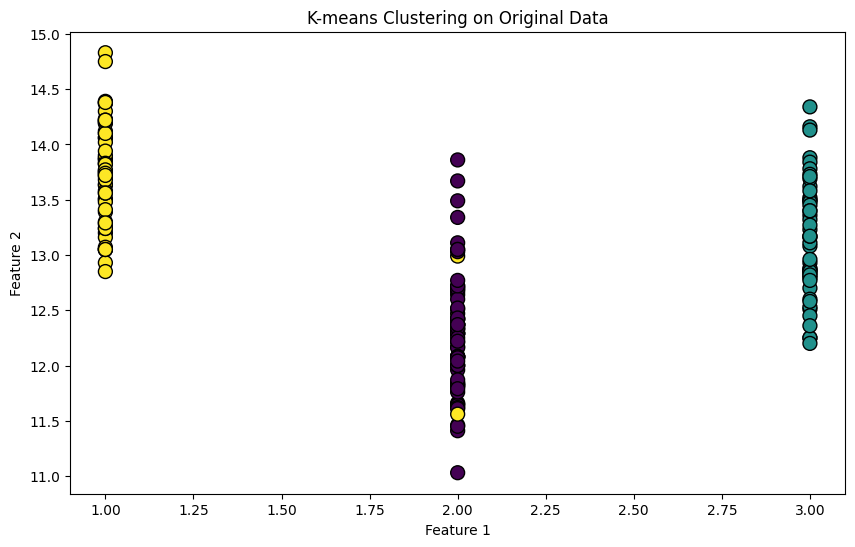

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


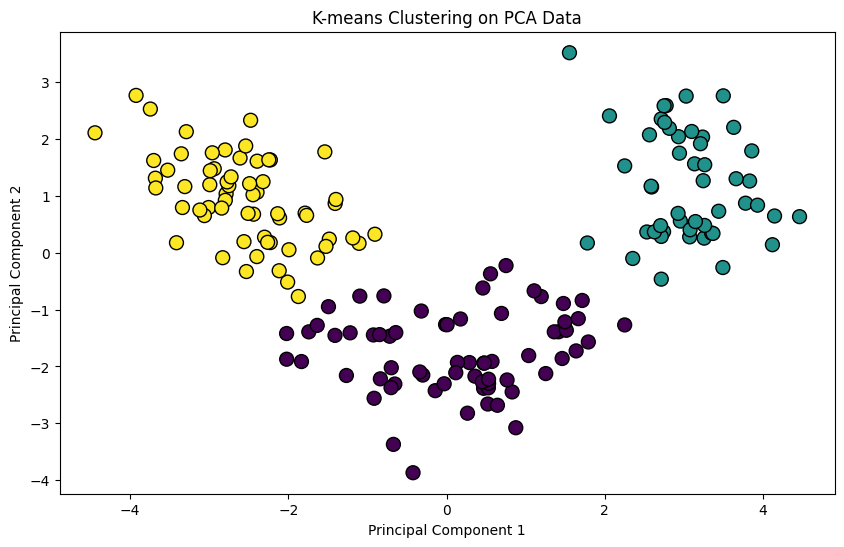

Silhouette Score (PCA Data): 0.35348646523303623
Davies-Bouldin Index (PCA Data): 1.1465061614630734
Comparison of Clustering Metrics:
Silhouette Score - Original Data: 0.30648398324833453, PCA Data: 0.35348646523303623
Davies-Bouldin Index - Original Data: 1.315707552261773, PCA Data: 1.1465061614630734
Key Findings and Insights:
- Dimensionality reduction via PCA can help visualize and potentially enhance clustering performance.
- The choice of principal components affects the clustering outcomes.
- Evaluate clustering performance with metrics such as Silhouette Score and Davies-Bouldin Index.


In [19]:
# Task 2: Dimensionality Reduction with PCA
# 1. Standardize the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)  # Scale the dataset
print(f"Scaled Data Shape: {scaled_df.shape}")

# Check if scaling was successful
if scaled_df is not None and scaled_df.size > 0:
    # 2. Implement PCA
    pca = PCA()
    pca.fit(scaled_df)

    # 3. Determine the optimal number of principal components
    # Scree plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.grid()
    plt.show()

    # Cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid()
    plt.axhline(y=0.95, color='r', linestyle='--')
    plt.axvline(x=7, color='r', linestyle='--')  # Adjust this value based on your scree plot
    plt.show()

    # 4. Transform the original dataset into the principal components
    optimal_components = 7  # Adjust based on the cumulative variance plot
    pca = PCA(n_components=optimal_components)
    pca_data = pca.fit_transform(scaled_df)
    print(f"Transformed data shape: {pca_data.shape}")

     # Task 3: Clustering with Original Data
    # 1. Apply K-means to the original dataset
    kmeans_original = KMeans(n_clusters=3, random_state=42)
    kmeans_labels_original = kmeans_original.fit_predict(scaled_df)

    # 2. Visualize the clustering results using a scatter plot (using first two features)
    plt.figure(figsize=(10, 6))
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_labels_original, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.title('K-means Clustering on Original Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # 3. Evaluate clustering performance
    silhouette_original = silhouette_score(scaled_df, kmeans_labels_original)
    davies_bouldin_original = davies_bouldin_score(scaled_df, kmeans_labels_original)
    print(f'Silhouette Score (Original Data): {silhouette_original}')
    print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_original}')

    # Task 4: Clustering with PCA Data
    # 1. Apply K-means to PCA-transformed data
    kmeans_pca = KMeans(n_clusters=3, random_state=42)
    kmeans_labels_pca = kmeans_pca.fit_predict(pca_data)

    # 2. Visualize the clustering results obtained from PCA-transformed data
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels_pca, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.title('K-means Clustering on PCA Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

    # 3. Evaluate clustering performance
    silhouette_pca = silhouette_score(pca_data, kmeans_labels_pca)
    davies_bouldin_pca = davies_bouldin_score(pca_data, kmeans_labels_pca)
    print(f'Silhouette Score (PCA Data): {silhouette_pca}')
    print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')

     # Task 5: Comparison and Analysis
    print(f"Comparison of Clustering Metrics:")
    print(f"Silhouette Score - Original Data: {silhouette_original}, PCA Data: {silhouette_pca}")
    print(f"Davies-Bouldin Index - Original Data: {davies_bouldin_original}, PCA Data: {davies_bouldin_pca}")


     # Task 6: Conclusion and Insights
    print("Key Findings and Insights:")
    print("- Dimensionality reduction via PCA can help visualize and potentially enhance clustering performance.")
    print("- The choice of principal components affects the clustering outcomes.")
    print("- Evaluate clustering performance with metrics such as Silhouette Score and Davies-Bouldin Index.")
else:
    print("Error: scaled_df is not defined.")


Explanation of the Code

Data Import and Basic Exploration:

The code begins by importing necessary libraries, loading the dataset, and displaying basic information like data types and missing values.

Histograms, box plots, and a correlation matrix are generated to provide insights into the distribution and relationships among the features.

Dimensionality Reduction with PCA:

Features are standardized using StandardScaler to have a mean of 0 and a standard deviation of 1.

PCA is applied, and the scree plot and cumulative explained variance plot are generated to determine the optimal number of principal components.

Clustering with Original Data:

K-Means clustering is applied to the original dataset, and the results are visualized using a scatter plot.

Performance metrics such as the silhouette score and Davies-Bouldin index are calculated for evaluation.

Clustering with PCA Data:

K-Means is applied to the PCA-transformed data, and clustering results are visualized similarly.

Performance metrics are again calculated for comparison.

Comparison and Analysis:

Clustering metrics from the original and PCA-transformed datasets are printed for comparison.

Conclusion and Insights:

The code concludes with a summary of key findings and insights, discussing the implications of PCA and clustering.